# Enhancing Credit Risk Assessment with Advanced Data Analytics and Machine Learning

## Project Overview

This project focuses on developing and implementing advanced credit risk assessment models that leverage the latest in machine learning and data analytics techniques. The primary objectives are as follows:

1. Data Collection and Preprocessing: Gather comprehensive financial and non-financial data from various sources, including credit histories, transaction records, socioeconomic factors, and macroeconomic indicators. Clean, preprocess, and standardize the data for further analysis.

2. Feature Engineering: Create relevant and informative features by extracting insights from the data. This step involves domain expertise to identify key predictors and transform raw data into meaningful variables.

3. Model Development: Build robust credit risk prediction models using a variety of machine learning algorithms, such as logistic regression, random forests, gradient boosting, and neural networks. Ensemble techniques and deep learning may also be explored for improved accuracy.

4. Model Validation: Thoroughly validate the models using historical data, cross-validation techniques, and out-of-sample testing. Assess model performance in terms of accuracy, precision, recall, and F1 score. Identify any issues related to overfitting or bias.

5. Interpretability and Explainability: Develop methods to interpret model decisions and provide explanations for credit risk assessments. This ensures transparency and compliance with regulatory requirements.

6. Stakeholder Communication: Establish clear communication channels with stakeholders, including risk managers, executives, and regulators, to convey model insights and risk assessment results.

7. Benefits: Ultimately, this project aims to enhance the accuracy of credit risk assessment, reduce default rates, optimize lending decisions, and improve the overall profitability and risk management of the financial institution or lending platform.

By combining the power of machine learning, data analytics, and model development, this credit risk project empowers financial institutions to make more informed lending decisions while minimizing potential losses. It represents a critical step toward a more secure and efficient lending ecosystem in today's data-driven world.

## 1. Data Validation

### 1.1 Preliminar Data Inspection

The data set has 32.851 rows and 12 columns (features), part of the data requieres imputation to fill missing values and cleaning, the steps of the cleaning process will be explained in the next point (1.2 Data cleaning and Filling missing values).

#### Features description:

- person_age: integer, age of the individual applying for the loan.
- person_income: numeric, annual income of the individual.
- person_home_ownership: categorical, type of home ownership of the individual:
    - rent: The individual is currently renting a property.
    - mortgage: The individual has a mortgage on the property they own.
    - own: The individual owns their home outright.
    - other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: numeric, employment length of the individual in years.
- loan_intent: categorical, the intent behind the loan application.
- loan_grade: categorical, the grade assigned to the loan based on the creditworthiness of the borrower:
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower's creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower's creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: numeric, the loan amount requested by the individual. 
- loan_int_rate: numeric, the interest rate associated with the loan.
- loan_status: binary, represents the loan status::
    - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
    - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: numeric, the percentage of income represented by the loan amount.
- cb_person_default_on_file: categorical, historical default of the individual as per credit bureau records:
    - Y: The individual has a history of defaults on their credit file.
    - N: The individual does not have any history of defaults.
- cb_person_cred_hist_length: integer, the length of credit history for the individual.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
risk_raw_df = pd.read_csv('credit_risk_dataset.csv')
risk_raw_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
risk_raw_df.shape

(32581, 12)

In [5]:
#Checking the data types in the data set
risk_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
#Checking unique values on each column
risk_raw_df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [7]:
#Checking some statistics to identify null values or errors
risk_raw_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
#Checking for inconsistencies on the categorical columns
print(risk_raw_df['person_home_ownership'].unique())
print(risk_raw_df['loan_intent'].unique())
print(risk_raw_df['loan_grade'].unique())
print(risk_raw_df['cb_person_default_on_file'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['D' 'B' 'C' 'A' 'E' 'F' 'G']
['Y' 'N']


In [9]:
#Checking for missing values
risk_raw_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 1.2 Data cleaning and Filling missing values

In order to clean the data we will proceed to do the following steps:

1. Transform the 'cb_person_default_on_file' column into binary values.
2. Visually inspect the missing values in all the columns.
3. Check for outliers in the numeric columns.
4. Filling the missing data by imputation of the missing values.

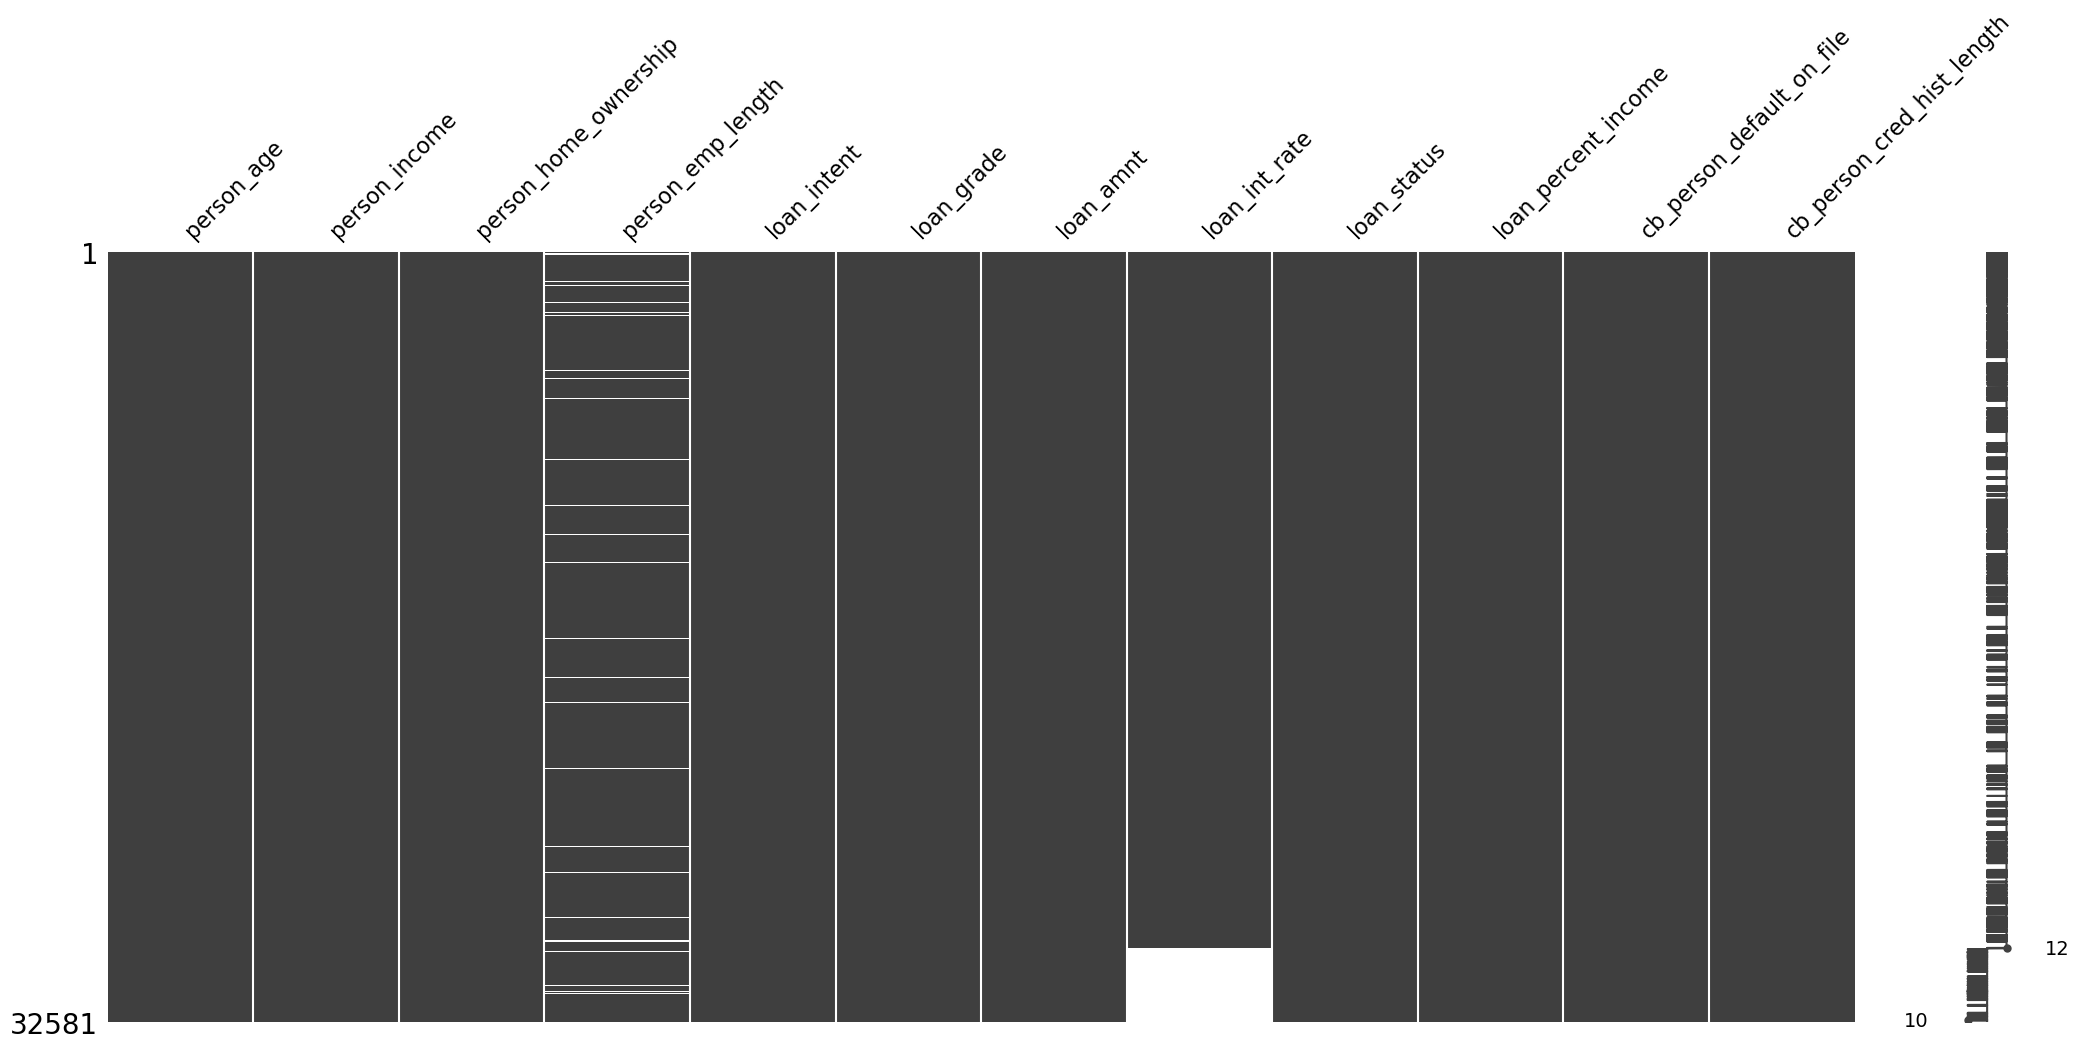

In [10]:
#Visualizing missing values
import missingno as msno
risk_raw_sort = risk_raw_df.sort_values('loan_int_rate')
msno.matrix(risk_raw_sort)
plt.show()

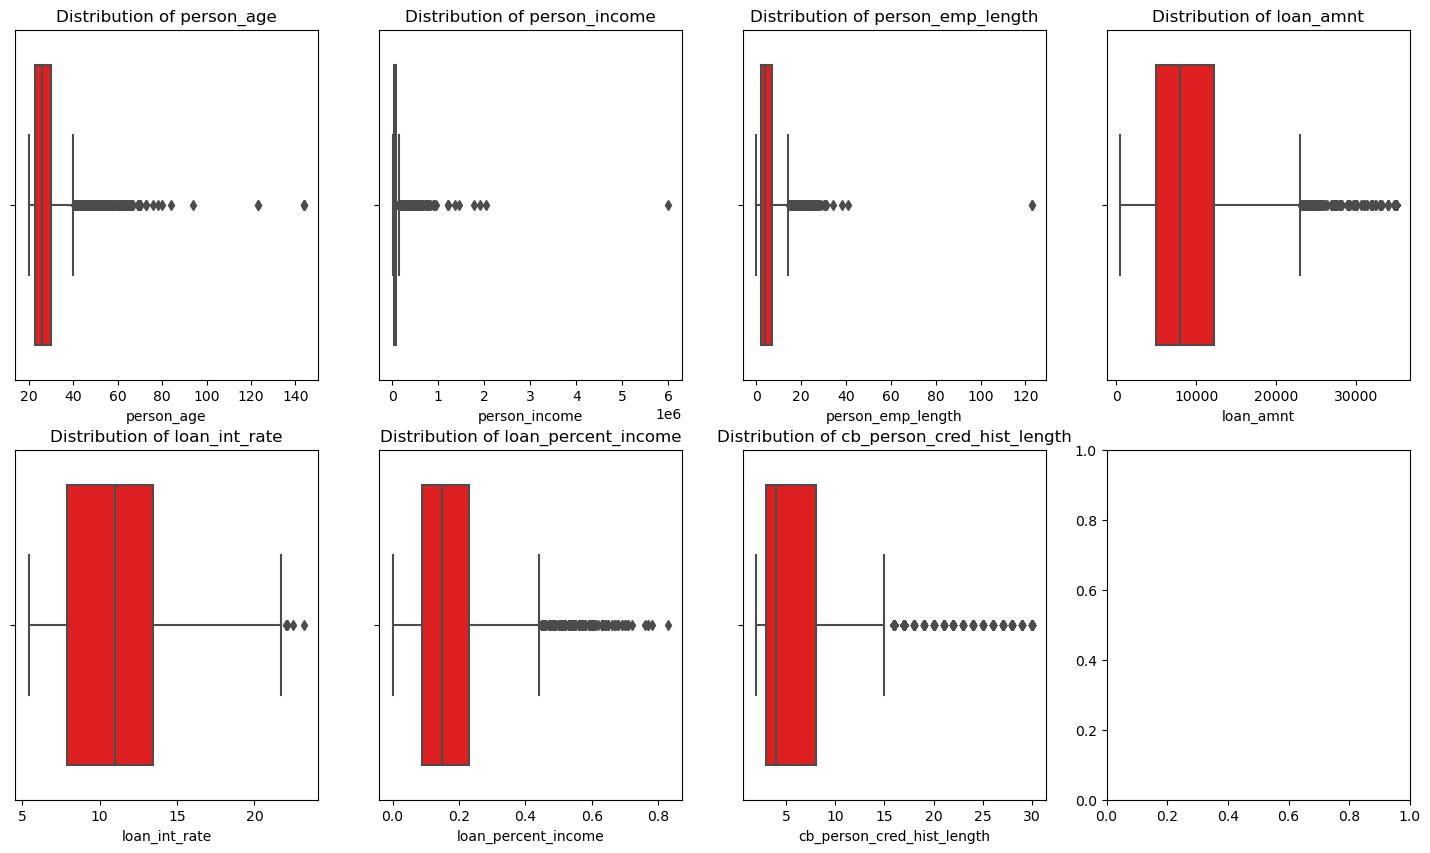

In [11]:
#Checking the distribution and outliers of integer and numeric columns
risk_plot = pd.DataFrame(risk_raw_df.select_dtypes([int, float]))  # Convert to DataFrame
risk_plot = risk_plot.drop(['loan_status'], axis=1)
fig, ax = plt.subplots(2, 4, figsize=(18,10))
ax = ax.ravel()  # Flatten the numpy array of Axes objects
for i, col in enumerate(risk_plot.columns):
    sns.boxplot(x=col, data=risk_plot, ax=ax[i], color='red').set(title='Distribution of '+col)

In [12]:
#Filling missing values with each column median
risk_cleaned = risk_raw_df.copy()
cols_with_missing_values = risk_cleaned.columns[risk_cleaned.isna().sum()>0]
print(cols_with_missing_values)

for col in cols_with_missing_values:
    risk_cleaned[col] = risk_cleaned[col].fillna(risk_cleaned[col].median())

risk_cleaned.isna().sum()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
#Changing the column "cb_person_default_on_file" type from categorical to binary
risk_cleaned['cb_person_default_on_file'] = risk_cleaned['cb_person_default_on_file'].replace(['Y', 'N'], [1, 0])
risk_cleaned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


Having the data clean, we can proceed to make the exploratory analysis.
## 2. Exploratory Analysis

We will explore the data in order to find the distribution of each variable and the relationships between them.

### 2.1 Correlation between features

First, we made a heatmap to serch for correlation between the variables, in the heatmap shown below we can see that there is moderate to strong correlation between some features. Next we have to transform the categorical features into numeric features and use all the available features to develop the model.

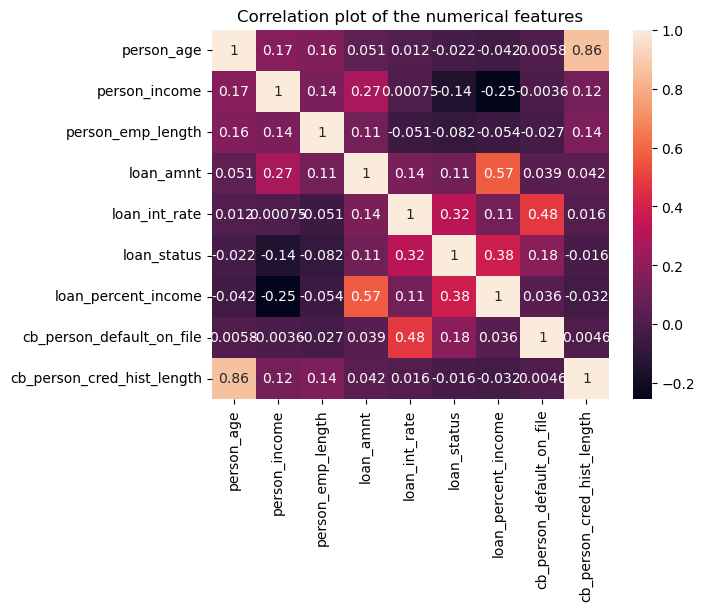

In [14]:
#Visualizing the correlation between features
sns.heatmap(risk_cleaned.select_dtypes(include='number').corr(), annot=True)
plt.title('Correlation plot of the numerical features')
plt.show()

### 2.2 Feature distribution

Then, we explore the distribution of each numeric variable, in the histograms shown below we can see the distribution of  the numeric features of the data set, as we can see we have skewed distributions on somefeatures so, we will need to use a transformer also, inspecting the boxplots we saw above, we see that the dataset has outliers so, we need to identify those outliers and exclude them for the model development.

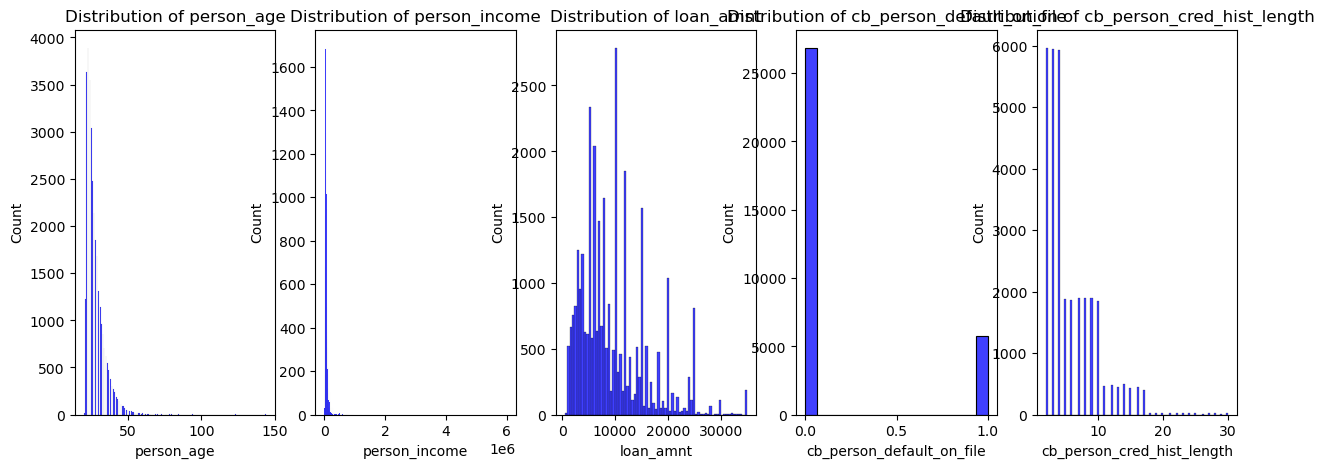

In [16]:
#Creating histograms to visualize the distribution of the integer columns
risk_hist = pd.DataFrame(risk_cleaned.select_dtypes([int]))  # Convert to DataFrame
risk_hist = risk_hist.drop(['loan_status'], axis=1)
fig, ax = plt.subplots(1, 5, figsize=(15,5))
ax = ax.ravel()  # Flatten the numpy array of Axes objects
for i, col in enumerate(risk_hist.columns):
    sns.histplot(x=col, data=risk_hist, ax=ax[i], color='blue').set(title='Distribution of '+col)

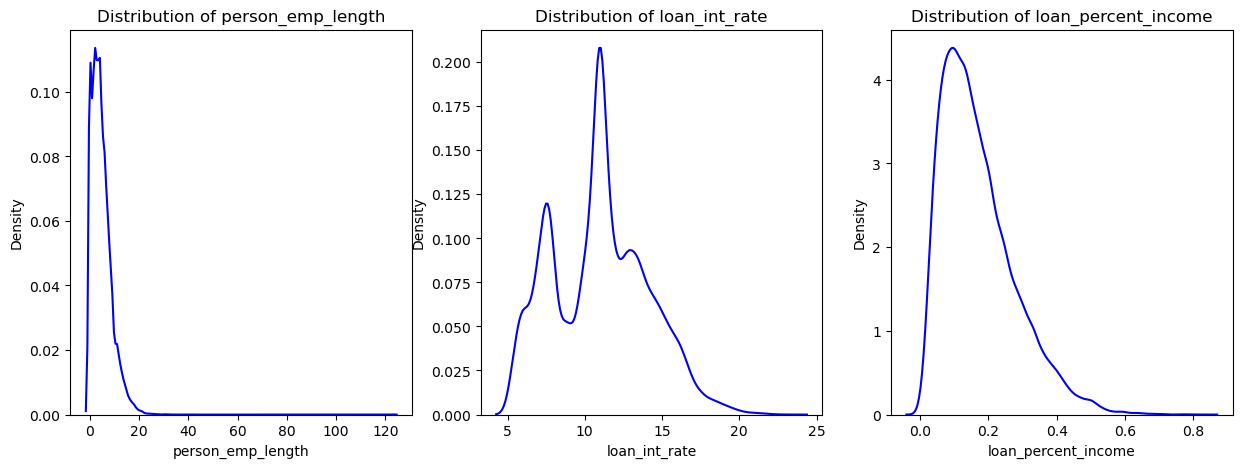

In [17]:
#Creating histograms to visualize the distribution of the numeric columns
risk_kde = pd.DataFrame(risk_cleaned.select_dtypes([float]))  # Convert to DataFrame
#risk_kde = risk_kde.drop(['loan_status'], axis=1)
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax = ax.ravel()  # Flatten the numpy array of Axes objects
for i, col in enumerate(risk_kde.columns):
    sns.kdeplot(x=col, data=risk_kde, ax=ax[i], color='blue').set(title='Distribution of '+col)

### 2.3 Relationship between categorical variables and loan status

The most common loan intent is Education while the least common loan intent is Home Improvement.

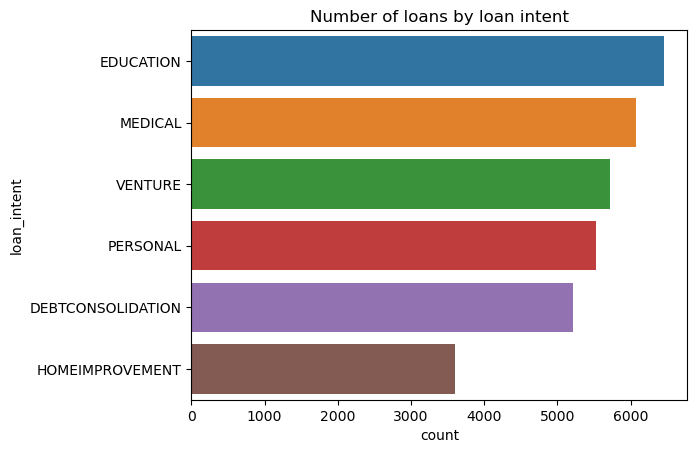

In [18]:
#Visualizing the number of loans by intent
sns.countplot(y = 'loan_intent', data = risk_cleaned, order = risk_cleaned['loan_intent'].value_counts().index)
plt.title("Number of loans by loan intent")
plt.show()

Most of the person's home ownership are either Rent or Mortage.

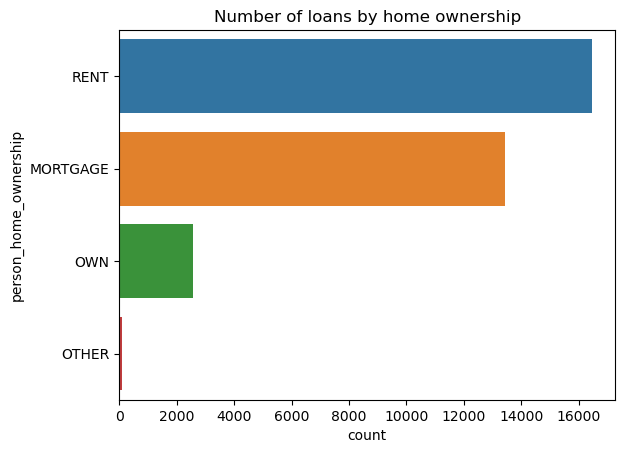

In [19]:
#Visualizing the number of loans by home ownership
sns.countplot(y = 'person_home_ownership', data = risk_cleaned, order = risk_cleaned['person_home_ownership'].value_counts().index)
plt.title("Number of loans by home ownership")
plt.show()

If we compare the number of loans by home ownership and loan status, we can see that there is a significant difference in the number of loans that have a default status: people with Rent tend to have a higher chance of default.

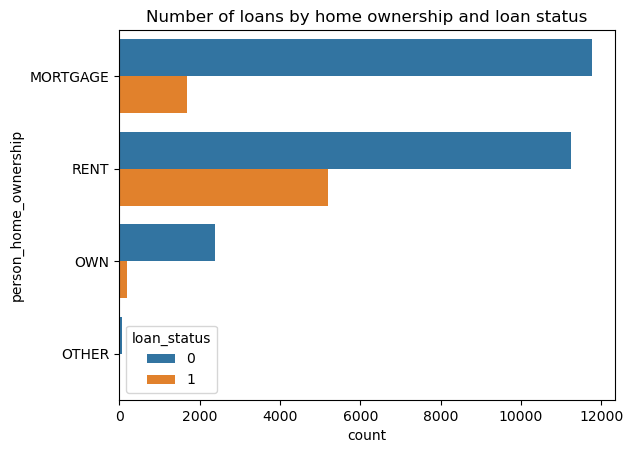

In [20]:
sns.countplot(y = 'person_home_ownership', data = risk_cleaned, hue='loan_status', order = risk_cleaned[risk_cleaned['loan_status']==0]['person_home_ownership'].value_counts().index, dodge=True)
plt.title("Number of loans by home ownership and loan status")
#plt.xlim(0, 100)
plt.show()

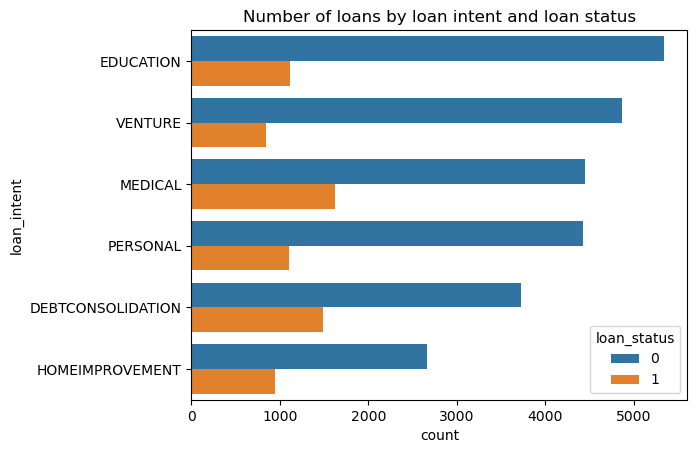

In [21]:
sns.countplot(y = 'loan_intent', data = risk_cleaned, hue='loan_status', order = risk_cleaned[risk_cleaned['loan_status']==0]['loan_intent'].value_counts().index, dodge=True)
plt.title("Number of loans by loan intent and loan status")
#plt.xlim(0, 100)
plt.show()

If we calculate a loan default ratio, we can see that the higher ratio comes from the loan intent "Debt Consolidation", the home ownership status "Rent" and the loan grade "G".

Average loan default rate: 0.22


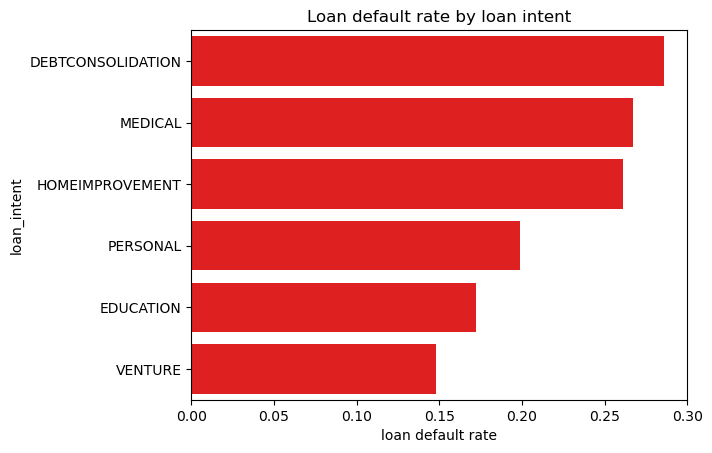

In [40]:
risk_grouped = risk_cleaned.copy()
risk_grouped = risk_grouped.groupby('loan_intent')['loan_status'].mean().to_frame(name='loan default rate').sort_values('loan default rate', ascending=False)
#print(recipes_grouped)
print('Average loan default rate: ' + str(round(risk_grouped['loan default rate'].mean(), 2)))
sns.barplot(y = risk_grouped.index, x = 'loan default rate', data = risk_grouped, color='red')
plt.title("Loan default rate by loan intent")
plt.show()

Average loan default ratio: 0.21


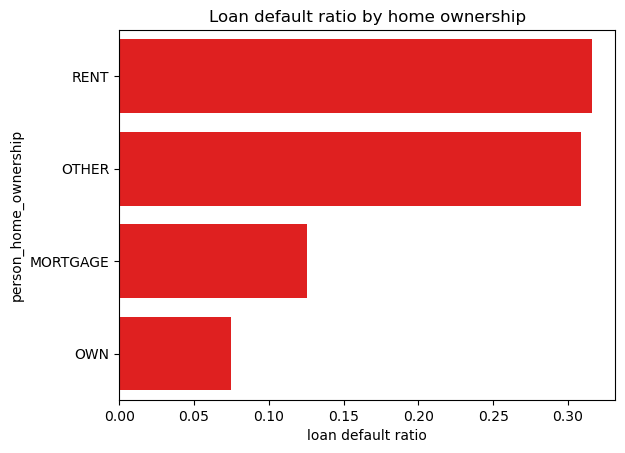

In [24]:
risk_grouped = risk_cleaned.copy()
risk_grouped = risk_grouped.groupby('person_home_ownership')['loan_status'].mean().to_frame(name='loan default ratio').sort_values('loan default ratio', ascending=False)
#print(recipes_grouped)
print('Average loan default ratio: ' + str(round(risk_grouped['loan default ratio'].mean(), 2)))
sns.barplot(y = risk_grouped.index, x = 'loan default ratio', data = risk_grouped, color='red')
plt.title("Loan default ratio by home ownership")
plt.show()

Average loan default ratio: 0.48


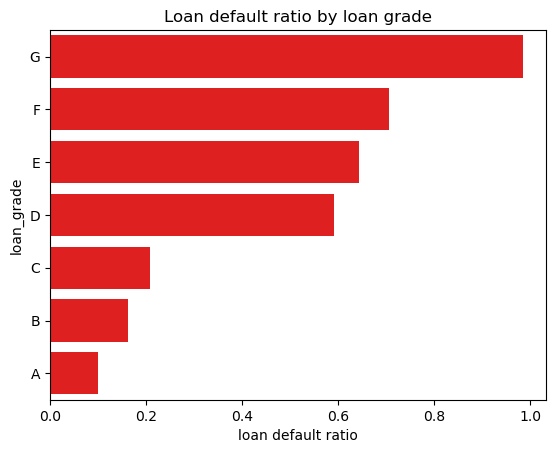

In [36]:
risk_grouped = risk_cleaned.copy()
risk_grouped = risk_grouped.groupby('loan_grade')['loan_status'].mean().to_frame(name='loan default ratio').sort_values('loan default ratio', ascending=False)
#print(recipes_grouped)
print('Average loan default ratio: ' + str(round(risk_grouped['loan default ratio'].mean(), 2)))
sns.barplot(y = risk_grouped.index, x = 'loan default ratio', data = risk_grouped, color='red')
plt.title("Loan default ratio by loan grade")
plt.show()

<Axes: xlabel='person_age', ylabel='loan_amnt'>

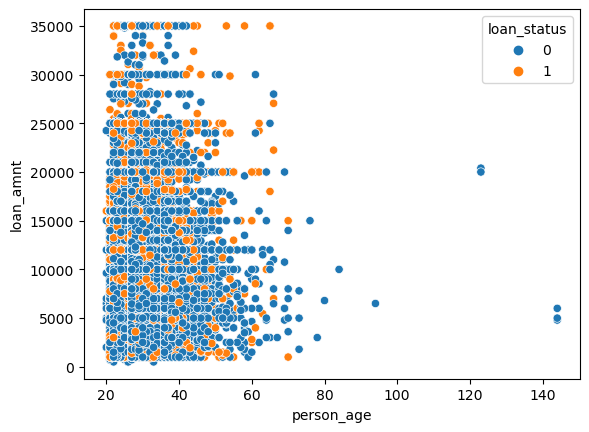

In [37]:
sns.scatterplot(x='person_age', y='loan_amnt', data=risk_cleaned, hue='loan_status')

### 2.5 Main findings

1. The most common loan intent are "Education", "Medical" and "Venture".
2. The most common home ownership are "Rent" and "Mortage".
3. The average loan default ratio by loan grade is 0.48 (48%).
4. There is no strong correlation between person age, the loan amount and the loan status.


## 3. Model Develpment

Since the target variable (loan_status) is a binary variable, the type of problem is _classification_ so we need to develop 2 classification models, compare them and select the best performing model to solve the business problem.

### 3.1 Data preprocessing

First, we need to transform the numeric features, we will use the quantile transformer to change the distribution of the data into a normal distribution, next we will transform categorical features into numeric features.

In [26]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution = 'normal')
features_to_transform = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']
features_to_spare = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'loan_status']
X0 = risk_cleaned[features_to_transform]
y0 = risk_cleaned['loan_status']
Z0 = risk_cleaned.drop(features_to_spare, axis=1)
X0.loc[:, :] = qt.fit_transform(X0)
risk_transformed = pd.concat([X0, y0, Z0], axis = 1)
risk_transformed.head()

C:\Users\AsusThunder\AppData\Local\Temp\ipykernel_18136\33897582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X0.loc[:, :] = qt.fit_transform(X0)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_status,person_home_ownership,loan_intent,loan_grade,loan_percent_income,cb_person_default_on_file
0,-1.349498,0.111890,5.199338,5.199338,1.597698,-0.599937,1,RENT,PERSONAL,D,0.59,1
1,-2.107953,-2.786593,0.253606,-2.542349,0.184203,-5.199338,0,OWN,EDUCATION,B,0.10,0
2,-0.204660,-2.786593,-0.945616,-0.512061,0.611996,-0.599937,1,MORTGAGE,MEDICAL,C,0.57,0
3,-0.832006,0.344187,-0.008782,5.199338,1.292465,-5.199338,1,RENT,MEDICAL,C,0.53,0
4,-0.475214,-0.021329,0.918498,5.199338,1.029375,-0.110627,1,RENT,MEDICAL,C,0.55,1


In [27]:
risk_transformed = pd.get_dummies(risk_transformed, ['person_home_ownership', 'loan_intent', 'loan_grade'])
risk_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_status,loan_percent_income,cb_person_default_on_file,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,-1.349498,0.111890,5.199338,5.199338,1.597698,-0.599937,1,0.59,1,0,...,0,1,0,0,0,0,1,0,0,0
1,-2.107953,-2.786593,0.253606,-2.542349,0.184203,-5.199338,0,0.10,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.204660,-2.786593,-0.945616,-0.512061,0.611996,-0.599937,1,0.57,0,1,...,1,0,0,0,0,1,0,0,0,0
3,-0.832006,0.344187,-0.008782,5.199338,1.292465,-5.199338,1,0.53,0,0,...,1,0,0,0,0,1,0,0,0,0
4,-0.475214,-0.021329,0.918498,5.199338,1.029375,-0.110627,1,0.55,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,2.747453,-0.070314,-0.945616,-0.475214,0.684763,5.199338,0,0.11,0,1,...,0,1,0,0,0,1,0,0,0,0
32577,2.575483,1.411293,-0.008782,1.189540,-1.029375,2.365248,0,0.15,0,1,...,0,1,0,1,0,0,0,0,0,0
32578,3.043856,0.622621,-0.296607,5.199338,-0.012546,2.967430,1,0.46,0,0,...,0,0,0,0,1,0,0,0,0,0
32579,2.696511,1.786156,0.253606,0.941700,0.234219,2.750341,0,0.10,0,1,...,0,1,0,0,1,0,0,0,0,0


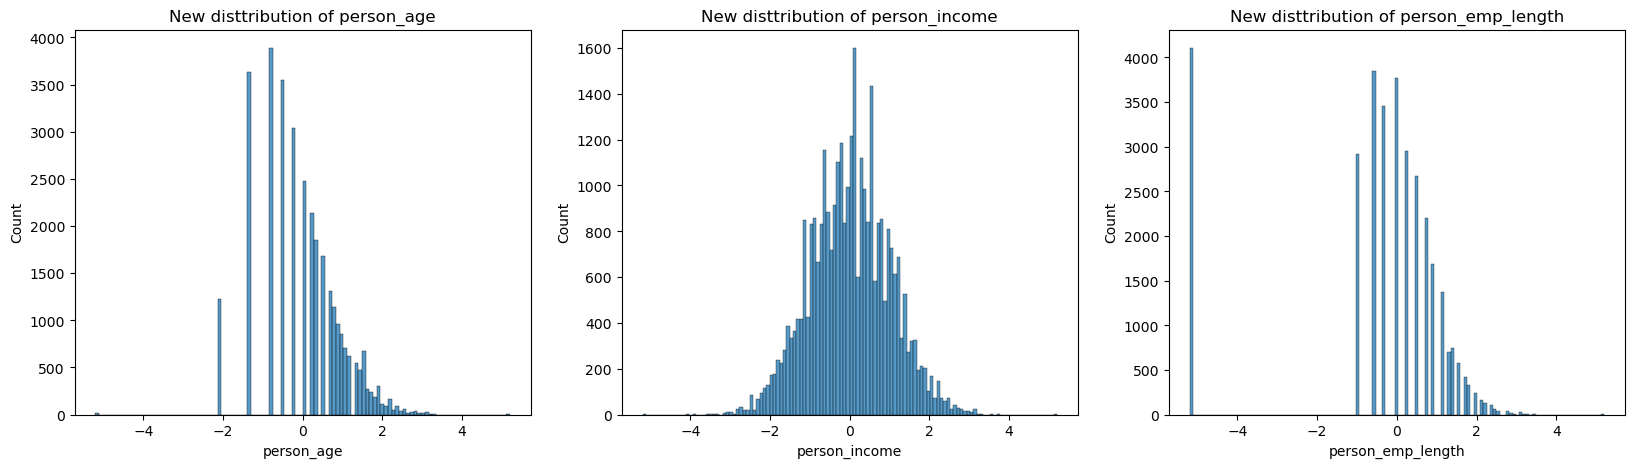

In [28]:
cols_subset = ['person_age', 'person_income', 'person_emp_length']
risk_plot_nd = risk_transformed[cols_subset]
fig, ax = plt.subplots(1, 3, figsize=(20,5))
for i, col in enumerate(risk_plot_nd.columns):
    sns.histplot(x=col, data=risk_plot_nd, ax=ax[i]).set(title='New disttribution of '+col)

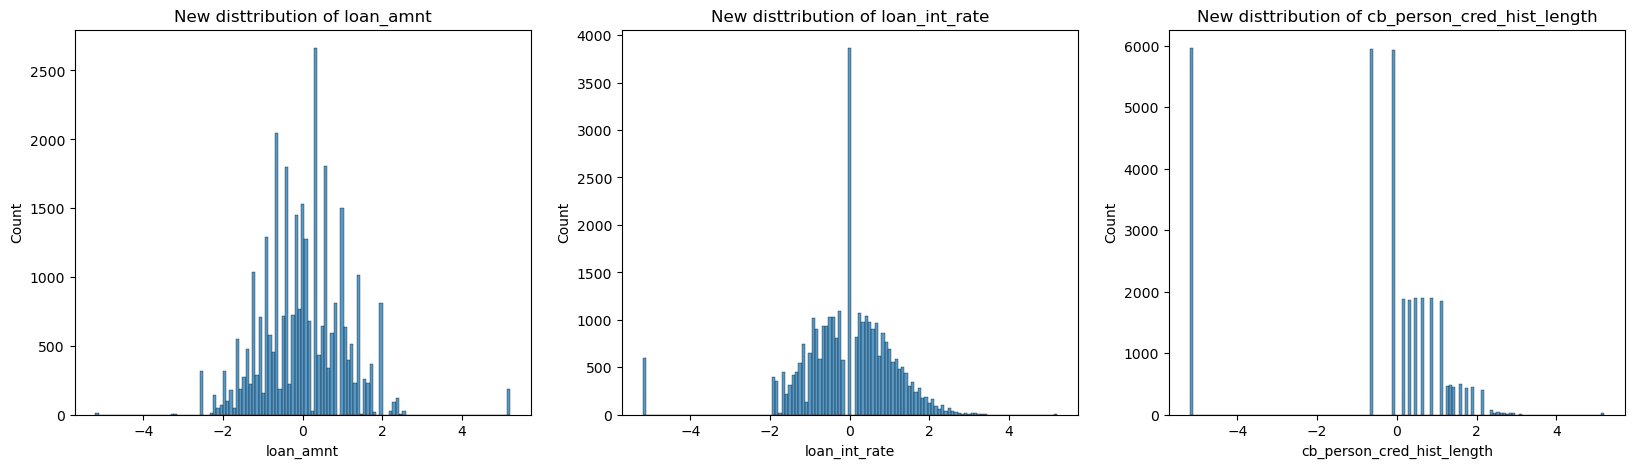

In [29]:
cols_subset = ['loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']
risk_plot_nd = risk_transformed[cols_subset]
fig, ax = plt.subplots(1, 3, figsize=(20,5))
for i, col in enumerate(risk_plot_nd.columns):
    sns.histplot(x=col, data=risk_plot_nd, ax=ax[i]).set(title='New disttribution of '+col)

With the data prepared, we will proceed to fit and compare the perfomance of two models; Logistic Regression and Decision Tree Classifier.
For both models we will get rid of the outliers, fit the model, predict and evaluate each model based on three metrics; ROC AUC, Accuracy Score and Precision Score.

### 3.2 Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from pyod.models.knn import KNN

def evaluate_outlier_classifier(model, data, threshold=.5):
    model.fit(data)

    probs = model.predict_proba(data)
    inliers = data[probs[:, 1] <= threshold]

    return inliers

def evaluate_model(inliers):
    X1, y1 = inliers.drop(['loan_status'], axis=1), inliers['loan_status']
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=100, stratify=y1, train_size=0.8)

    lr = LogisticRegression(solver='newton-cg', random_state=100)
    lr.fit(X1_train, y1_train)

    y1_pred_probs = lr.predict_proba(X1_test)[:, 1]
    y1_pred = lr.predict(X1_test)
    fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_probs)
    roc_auc_score_lr = roc_auc_score(y1_test, y1_pred_probs)
    acc_score = accuracy_score(y1_test, y1_pred)
    prec_score = precision_score(y1_test, y1_pred)
    return round(roc_auc_score_lr, 2), round(acc_score, 2), round(prec_score, 2)

n_neighbors = [5, 10, 15, 20]
scores = dict()

for k in n_neighbors:
    
    knn = KNN(n_neighbors=k, n_jobs=-1)
    
    inliers = evaluate_outlier_classifier(knn, risk_transformed, .505)
    scores[k] = evaluate_model(inliers)
scores_df = pd.DataFrame(scores)
scores_df = scores_df.rename(columns={5:'knn=5', 10:'knn=10', 15:'knn=15', 20:'knn=20'})
scores_df['Scores'] = ['ROC AUC', 'Accuracy', 'Precision']
scores_df = scores_df.set_index('Scores')
scores_df

,knn=5,knn=10,knn=15,knn=20
Scores,,,,
ROC AUC,0.87,0.88,0.88,0.88
Accuracy,0.86,0.87,0.87,0.87
Precision,0.75,0.78,0.78,0.77


In [31]:
knn_f = KNN(n_neighbors=15, n_jobs=-1) #best parameters
inliers_f = evaluate_outlier_classifier(knn_f, risk_transformed, .505)

In [32]:
from sklearn.metrics import classification_report

X, y = inliers_f.drop(['loan_status'], axis = 1), inliers_f['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=100, train_size=0.8)

model = LogisticRegression(solver='newton-cg', random_state=100)
model.fit(X_train, y_train)

y_pred_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc_score_model = roc_auc_score(y_test, y_pred_probs)
acc_score_model = accuracy_score(y_test, y_pred)
prec_score_model = precision_score(y_test, y_pred)
print('ROC AUC Score: '+str(round(roc_auc_score_model, 2)), ', Accuracy Score: '+str(round(acc_score_model, 2)), ', Precision Score: '+str(round(prec_score_model, 2)))

ROC AUC Score: 0.88 , Accuracy Score: 0.87 , Precision Score: 0.78


### 3.3 Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=100)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_probs_tree = tree.predict_proba(X_test)[:, 1]
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, y_pred_probs_tree)
roc_auc_score_model_tree = roc_auc_score(y_test, y_pred_probs_tree)
acc_score_model_tree = accuracy_score(y_test, y_pred_tree)
prec_score_model_tree = precision_score(y_test, y_pred_tree)
print('ROC AUC Score: '+str(round(roc_auc_score_model_tree, 2)), ', Accuracy Score: '+str(round(acc_score_model_tree, 2)), 'Precision Score: '+str(round(prec_score_model_tree, 2)))

ROC AUC Score: 0.84 , Accuracy Score: 0.89 Precision Score: 0.73


0.88 0.87 0.78


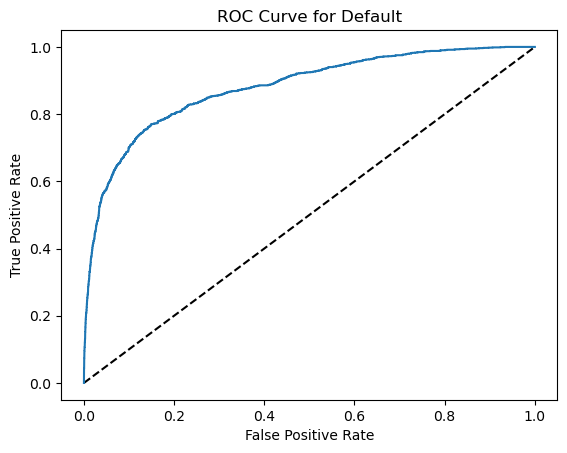

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5082
           1       0.78      0.57      0.66      1417

    accuracy                           0.87      6499
   macro avg       0.83      0.76      0.79      6499
weighted avg       0.86      0.87      0.86      6499



In [38]:
print(round(roc_auc_score_model, 2), round(acc_score_model, 2), round(prec_score_model, 2))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Default')
plt.show()
print(classification_report(y_test, y_pred))

                      feature name  coefficient
6              loan_percent_income    10.298519
24                    loan_grade_G     3.105485
23                    loan_grade_F     1.056838
11      person_home_ownership_RENT     0.925837
22                    loan_grade_E     0.780739
21                    loan_grade_D     0.512946
14     loan_intent_HOMEIMPROVEMENT     0.505349
12   loan_intent_DEBTCONSOLIDATION     0.443611
9      person_home_ownership_OTHER     0.399845
15             loan_intent_MEDICAL     0.272474
8   person_home_ownership_MORTGAGE     0.184594
4                    loan_int_rate     0.155247
7        cb_person_default_on_file     0.035870
5       cb_person_cred_hist_length    -0.010222
0                       person_age    -0.013774
2                person_emp_length    -0.027356
16            loan_intent_PERSONAL    -0.177491
3                        loan_amnt    -0.360139
1                    person_income    -0.365187
13           loan_intent_EDUCATION    -0

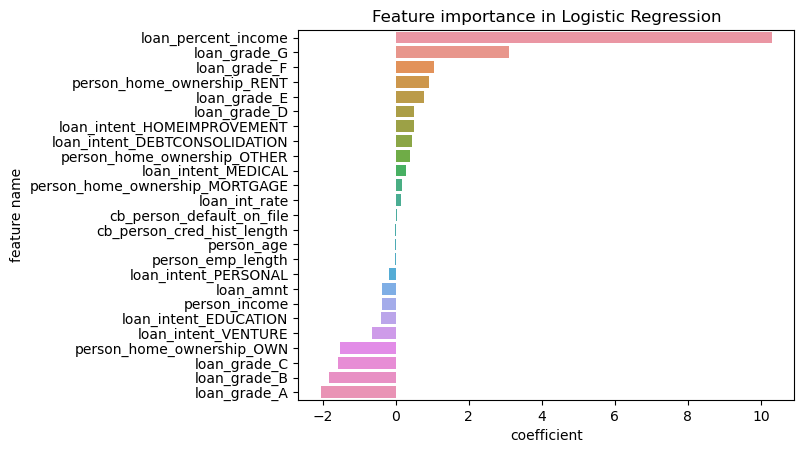

In [35]:
feature_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'loan_percent_income', 'cb_person_default_on_file', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G']
resultdict = {}
importances_logreg = pd.DataFrame({'feature name': feature_cols,'coefficient': model.coef_[0]}).sort_values('coefficient', ascending=False)
print(importances_logreg)
sns.barplot(x='coefficient', y='feature name', data=importances_logreg)
plt.title("Feature importance in Logistic Regression")
plt.show()

## 4. Model Evaluation

### 4.1 Logistic Regression

The metrics for the first model are:

1. ROC AUC Score: **88%**
2. Accuracy Score: **87%**
3. Precision Score: **78%**

### 4.2 Decision Tree Classifier

The metrics for the first model are:

1. ROC AUC Score: **84%**
2. Accuracy Score: **89%**
3. Precision Score: **73%**

### 4.3 Comparing results

The **Logistic Regression** model has 88% ROC AUC score, while the **Decision Tree Clasiffier** model as 84%, based on this result we can conclude that the **Logistic Regression** model adjust better to the data.

Likewise, the **Logistic Regression** model has 87% and 78% on Accuracy and Precision scores respectively, while the **Decision Tree Clasiffier** model has 89% and 73%, based on this result we can conclude that the **Logistic Regression** model predicts better with higher confidence results.


## 5. Final Summary and Recomendations

The recommendations are as follows:

1. Deploy the Logistc Regression model into production, to predict defaults before happening.
2. In order to avoid loan default, the business must avoid clients with loan grade F or G, also avoid granting loans whose amount represents a high percentage of the client's income.
3. Based on the dimensional analysis, parameters for loan approval must be established, such as the percentage of the client's income to be allocated to loan repayment, and reserve the right to grant loans to clients with a credit history category of F or G.
4. Continuously monitor the default ratio, it is suggested to create a dashboard for this purpose.